In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from pandas import read_csv, DataFrame
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense,Dropout
from tensorflow.keras.models import Model

C:\Users\pavig\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pavig\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pavig\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pavig\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

# Loading the Dataset(UCI)

In [2]:
cancer_data = np.load('cancer_data.npy', allow_pickle=True)

In [3]:
cdata=cancer_data[:, :-1]
clabel=cancer_data[:, -1]


In [4]:
clabel=pd.DataFrame(clabel)
cdata=pd.DataFrame(cdata)

In [5]:
ncol = cdata.shape[1]

# Splitting The Data Into Test and Train

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(cdata, clabel, train_size = 0.8, random_state = 42)

# Defining and training the DEEP AUTOENCODER

In [7]:
input_dim = Input(shape = (ncol, ))
# DEFINE THE DIMENSION OF ENCODER ASSUMED 3
encoding_dim = 15
# ENCODING LAYERS OF THE AUTOENCODER
encoded1 = Dense(40, activation = 'relu')(input_dim)
encoded2 = Dense(20, activation = 'relu')(encoded1)
encoded3 = Dense(10, activation = 'relu')(encoded2)
encoded4 = Dense(encoding_dim, activation = 'relu')(encoded3)
# DECODING LAYERS OF THE AUTOENCODER
decoded1 = Dense(10, activation = 'relu')(encoded4)
decoded2 = Dense(20, activation = 'relu')(decoded1)
decoded3 = Dense(40, activation = 'relu')(decoded2)
decoded4 = Dense(ncol, activation = 'sigmoid')(decoded3)
# COMBINING THE  ENCODING  AND DECODING LAYERS INTO AN AUTOENCODER MODEL
autoencoder = Model(input_dim, decoded4)
autoencoder.summary()
# CONFIGURING AND TRAINING THE AUTOENCODER
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
History=autoencoder.fit(X_train, X_train, epochs =10, batch_size =64)
#EXTRACTING THE DATA WITH REDUCED DIMENSIONALITY FROM THE CONFIGURED AND TRAINED AUTOENCODER
encoder = Model(input_dim, encoded4)
encoded_input = Input(shape = (encoding_dim, ))
encoded_out = encoder.predict(X_test)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20242)]           0         
_________________________________________________________________
dense (Dense)                (None, 40)                809720    
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                160       
_________

Evaluating the Deep Autoencoder

In [8]:
loss = History.history['loss']
print("Loss ", loss[9])

Loss  0.21239723406627598


Extracting the encoded data

In [9]:

encoded_out = encoder.predict(cdata)


# Defining the CNN Classifier

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
model = Sequential()
model.add(Embedding(82, 32, input_length=15))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size = 3))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(173,activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 15, 32)            2624      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 128)           20608     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 128)            0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                19250     
_________________________________________________________________
dense_11 (Dense)             (None, 173)              

In [11]:
labels=np.asarray(clabel)


In [12]:
labels=np.where(labels=='BLADDER', 1, labels) 
labels=np.where(labels=='BLCA', 2, labels) 
labels=np.where(labels=='BRCA', 3, labels) 
labels=np.where(labels=='KIRC', 4, labels) 
labels=np.where(labels=='COAD', 5, labels)
labels=np.where(labels=='BREAST', 6, labels)
labels=np.where(labels=='CERVIX', 7, labels)
labels=np.where(labels=='CESC', 8, labels)
labels=np.where(labels=='CHOL', 9, labels)
labels=np.where(labels=='COLON', 10, labels)
labels=np.where(labels=='ESCA', 11 ,labels)
labels=np.where(labels=='ESOPHAGUS_GAS', 12, labels)
labels=np.where(labels=='ESOPHAGUS_MUC', 13, labels)
labels=np.where(labels=='ESOPHAGUS_MUS', 14, labels)
labels=np.where(labels=='HNSC', 15, labels)
labels=np.where(labels=='KICH', 16, labels)
labels=np.where(labels=='KIDNEY', 17, labels)
labels=np.where(labels=='KIRP', 18, labels)
labels=np.where(labels=='LIHC', 19, labels)
labels=np.where(labels=='LIVER', 20, labels)
labels=np.where(labels=='LUAD', 21, labels)
labels=np.where(labels=='LUNG', 22, labels)
labels=np.where(labels=='LUSC', 23, labels)
labels=np.where(labels=='PRAD', 24, labels)
labels=np.where(labels=='PROSTATE', 25, labels)
labels=np.where(labels=='READ', 26, labels)
labels=np.where(labels=='SALIVARY', 27, labels)
labels=np.where(labels=='STAD', 28, labels)
labels=np.where(labels=='STOMACH', 29, labels)
labels=np.where(labels=='THCA', 30, labels)
labels=np.where(labels=='THYROID', 31, labels)
labels=np.where(labels=='UCEC', 32, labels)
labels=np.where(labels=='UCS', 33, labels)
labels=np.where(labels=='UTERUS', 34, labels)
dfencoded_out=pd.DataFrame(encoded_out)
dlabels=pd.DataFrame(labels)
train1, test1, train2, test2 = train_test_split(dfencoded_out, dlabels,train_size = 0.8,random_state =0)

Training the Classifier

In [15]:
model.fit(train1, train2, epochs=150,verbose = 1, batch_size=8)

Epoch 1/150
7416/7416 [==============================] - 2s 244us/sample - loss: 2.2132 - acc: 0.3900
Epoch 2/150
7416/7416 [==============================] - 2s 213us/sample - loss: 1.3412 - acc: 0.5692
Epoch 3/150
7416/7416 [==============================] - 2s 213us/sample - loss: 1.2392 - acc: 0.5891
Epoch 4/150
7416/7416 [==============================] - 2s 215us/sample - loss: 1.1932 - acc: 0.6081
Epoch 5/150
7416/7416 [==============================] - 2s 211us/sample - loss: 1.1710 - acc: 0.6201
Epoch 6/150
7416/7416 [==============================] - 2s 211us/sample - loss: 1.1374 - acc: 0.6207
Epoch 7/150
7416/7416 [==============================] - 2s 212us/sample - loss: 1.1172 - acc: 0.6249
Epoch 8/150
7416/7416 [==============================] - 2s 212us/sample - loss: 1.1056 - acc: 0.6270
Epoch 9/150
7416/7416 [==============================] - 2s 210us/sample - loss: 1.0867 - acc: 0.6326
Epoch 10/150
7416/7416 [==============================] - 2s 212us/sample - loss: 

7416/7416 [==============================] - 2s 217us/sample - loss: 0.7823 - acc: 0.6984
Epoch 80/150
7416/7416 [==============================] - 2s 215us/sample - loss: 0.7779 - acc: 0.7017
Epoch 81/150
7416/7416 [==============================] - 2s 216us/sample - loss: 0.7723 - acc: 0.7008
Epoch 82/150
7416/7416 [==============================] - 2s 215us/sample - loss: 0.7877 - acc: 0.6977
Epoch 83/150
7416/7416 [==============================] - 2s 214us/sample - loss: 0.7794 - acc: 0.6970
Epoch 84/150
7416/7416 [==============================] - 2s 214us/sample - loss: 0.7732 - acc: 0.7008
Epoch 85/150
7416/7416 [==============================] - 2s 214us/sample - loss: 0.7707 - acc: 0.7066
Epoch 86/150
7416/7416 [==============================] - 2s 213us/sample - loss: 0.7618 - acc: 0.7086
Epoch 87/150
7416/7416 [==============================] - 2s 212us/sample - loss: 0.7696 - acc: 0.7013
Epoch 88/150
7416/7416 [==============================] - 2s 215us/sample - loss: 0.77

Evaluating the CNN classifier

In [48]:
scores=model.evaluate(train1,train2,verbose=1)
print("Accuracy: ", scores[1])

7416/7416 [==============================] - 0s 33us/sample - loss: 0.3114 - acc: 0.8575
Accuracy:  0.85747033


# Pairwise Clustering

In [17]:
indices = []
for i in range(dfencoded_out.shape[0]):
    indices.append("sample" + str(i))

In [18]:
columns = []
for i in range(15):
    columns.append("col" + str(i)) 

In [19]:
df_e = pd.DataFrame(data=encoded_out, index=indices, columns=columns)

In [20]:
df_l = pd.DataFrame(data=labels, index=indices, columns=["label"])
columns.append("label")

In [21]:
cluster_pd = pd.concat([df_e,df_l], axis=1, sort=False)

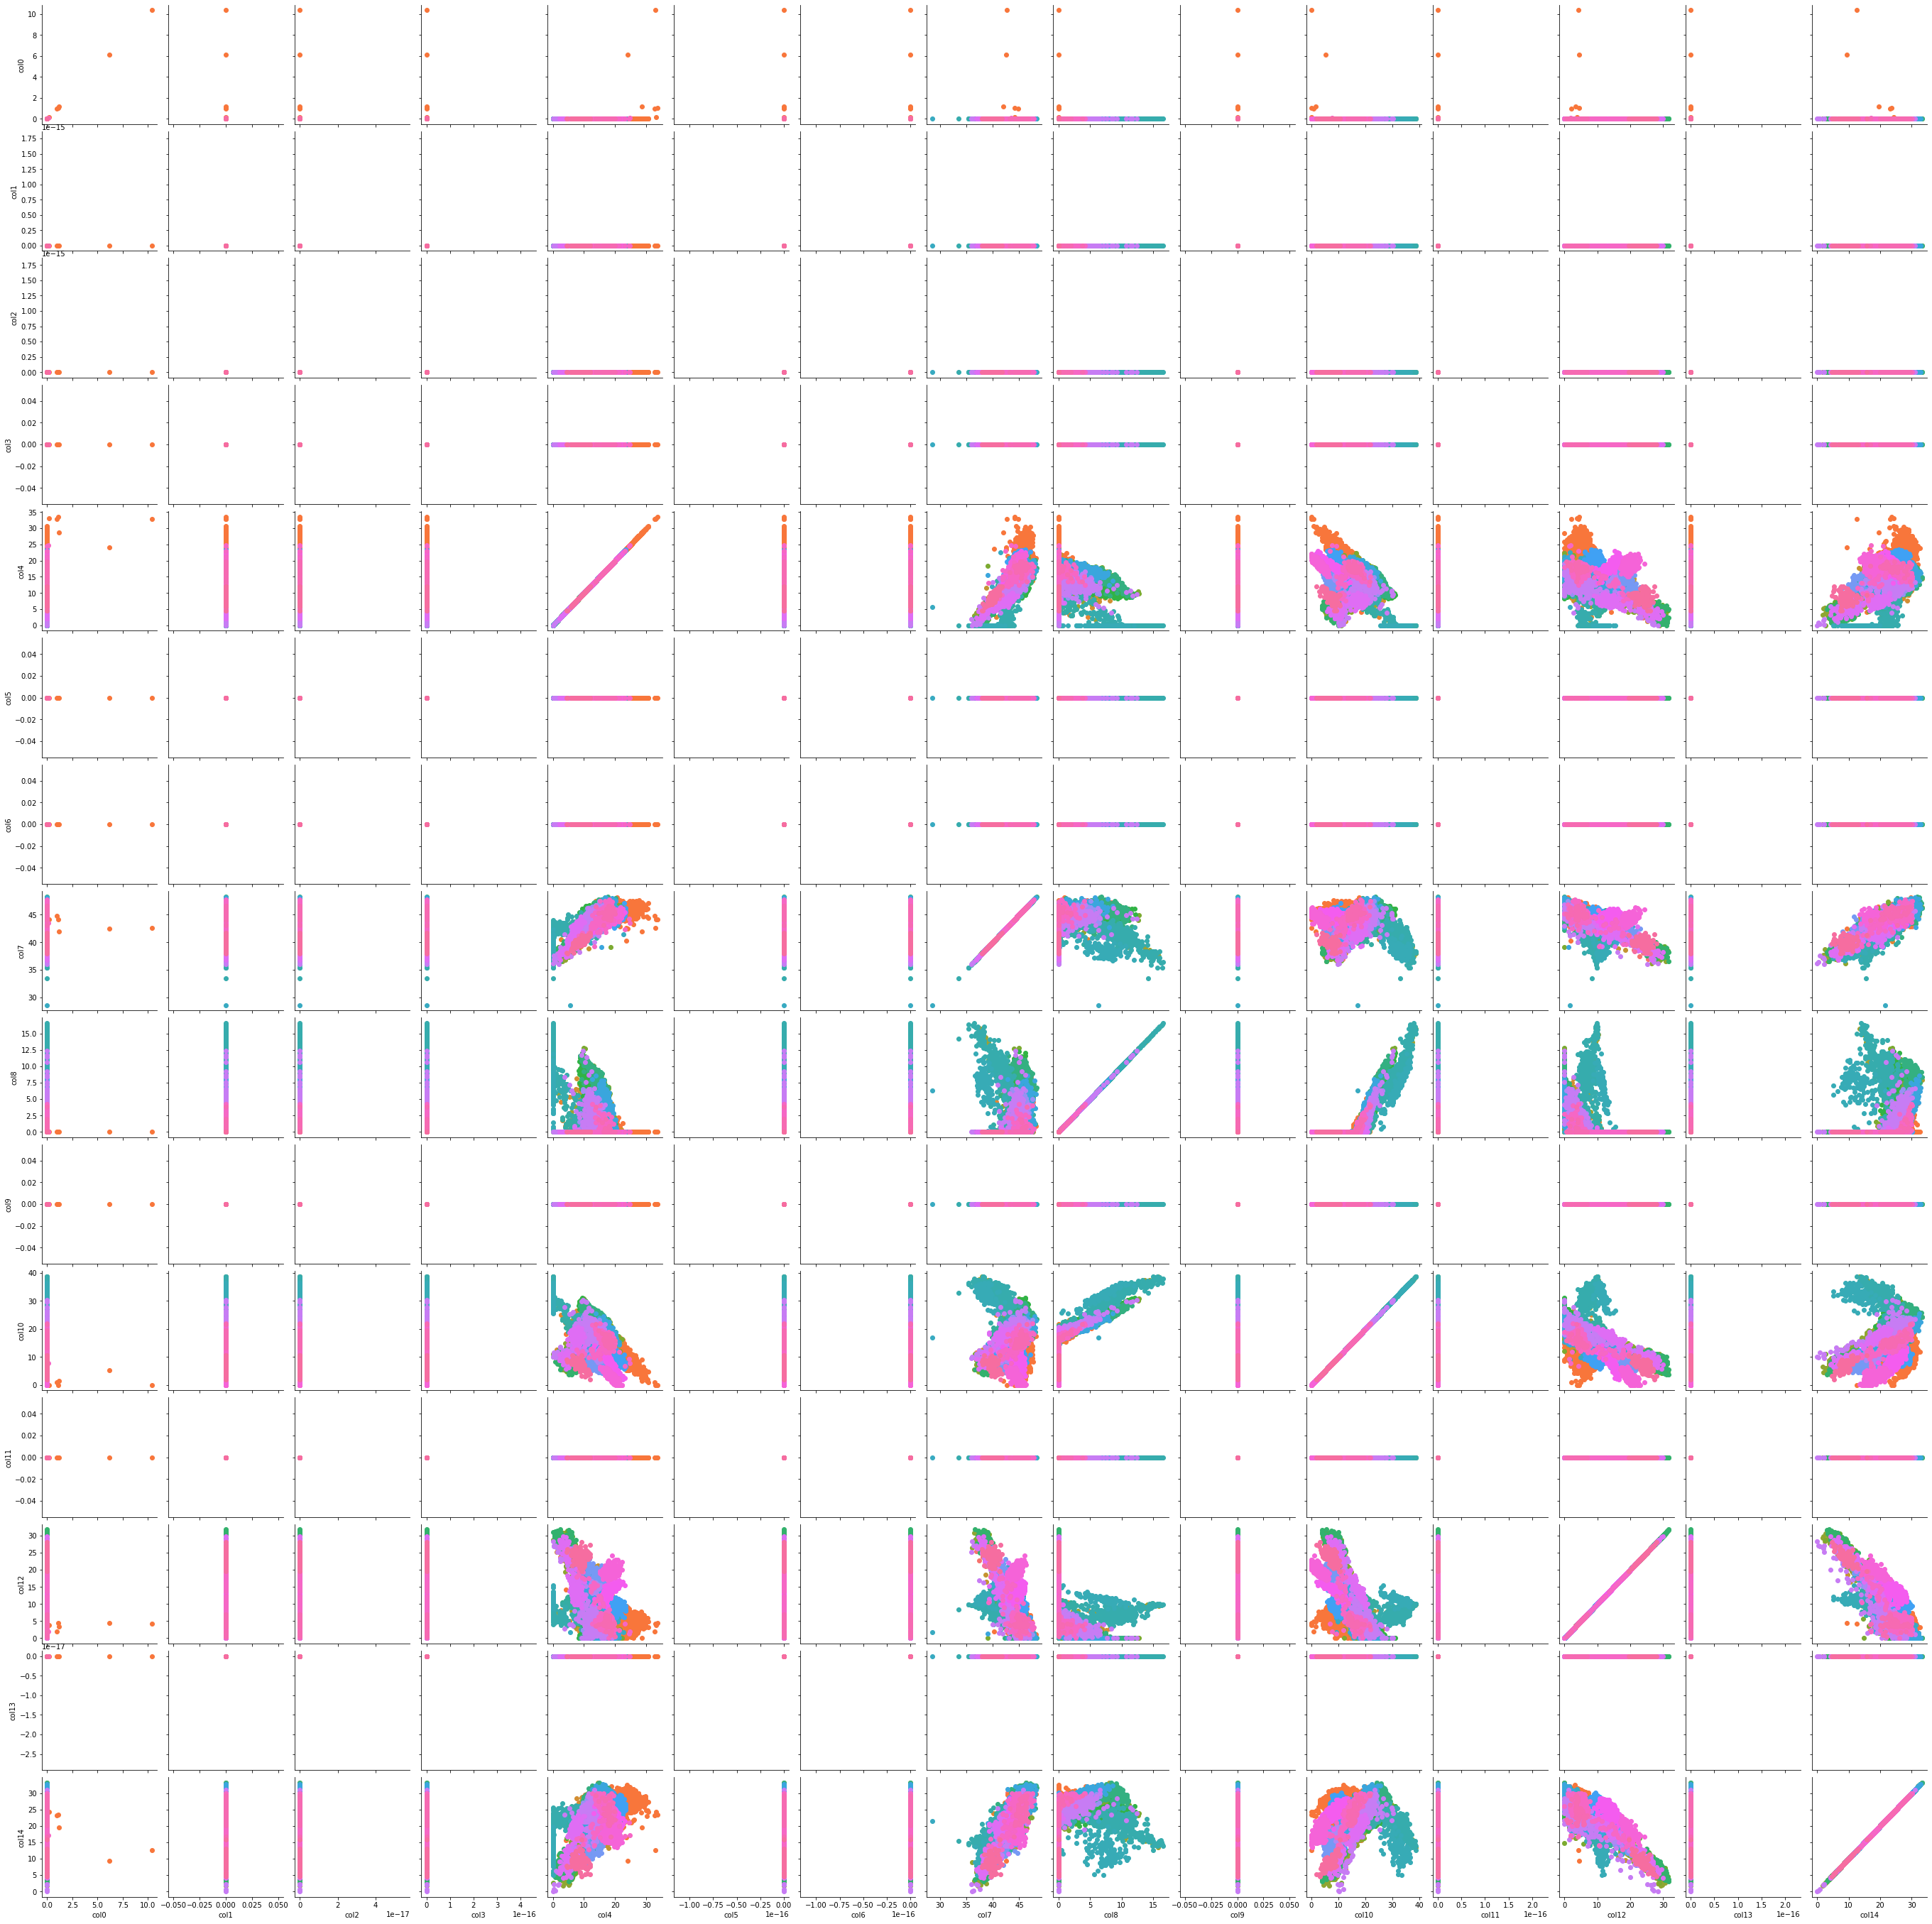

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d
g = sns.PairGrid(cluster_pd, hue = 'label')
g.map(plt.scatter);

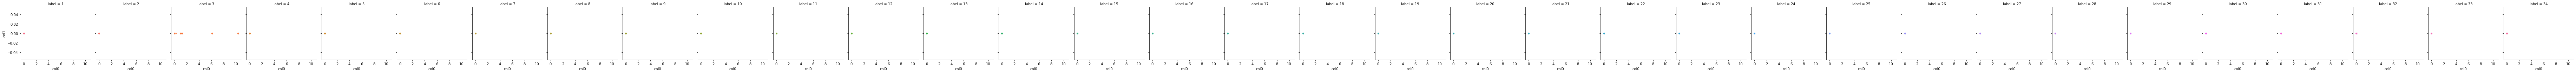

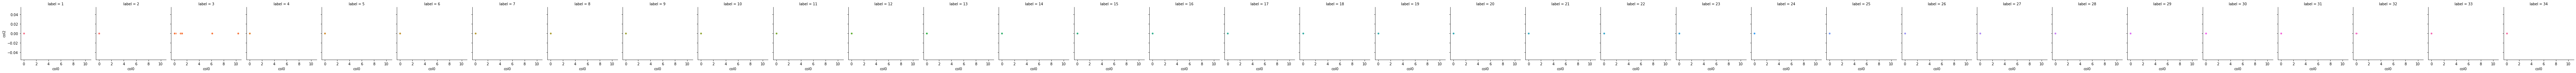

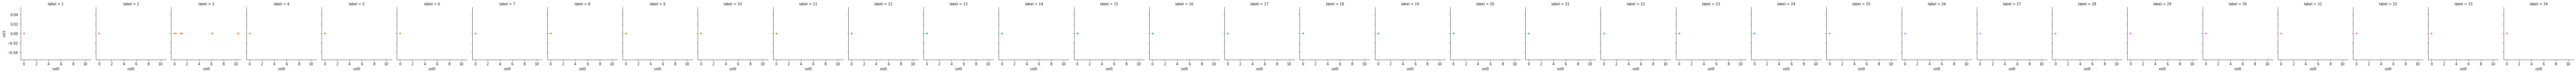

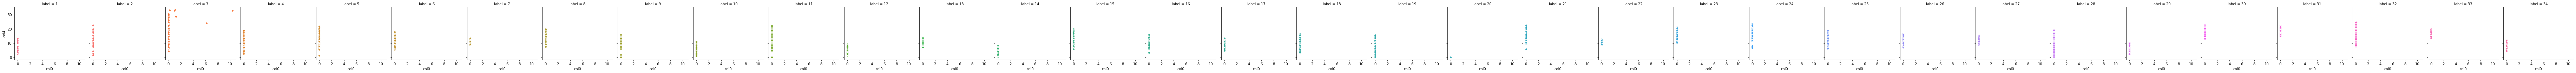

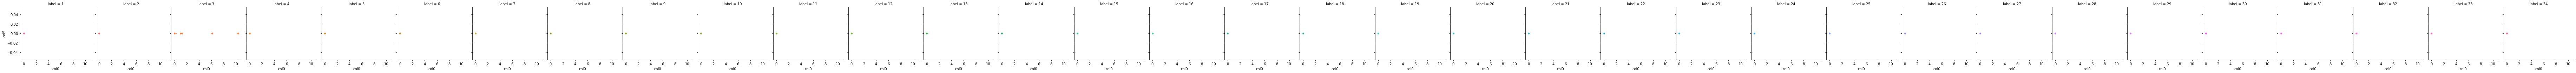

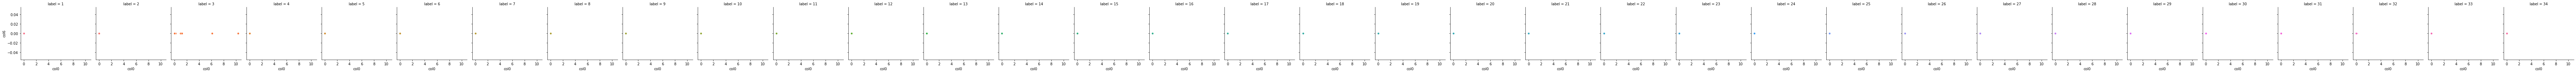

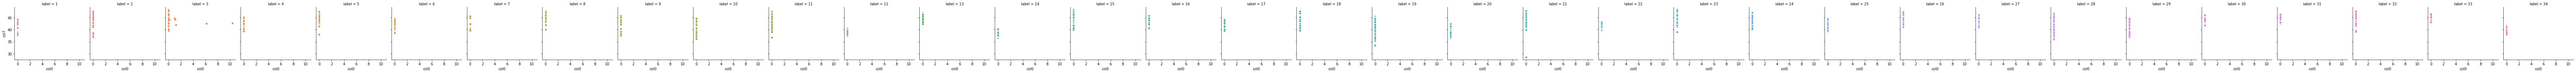

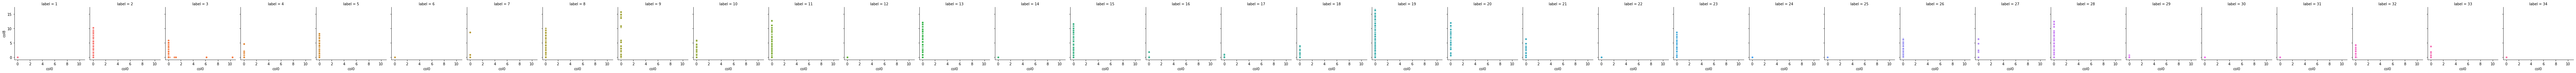

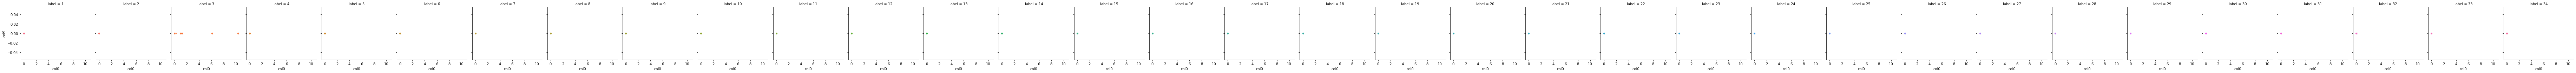

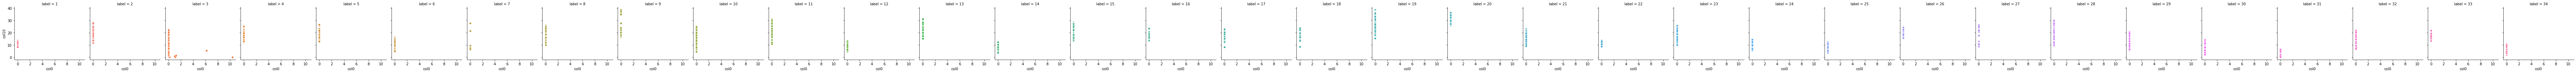

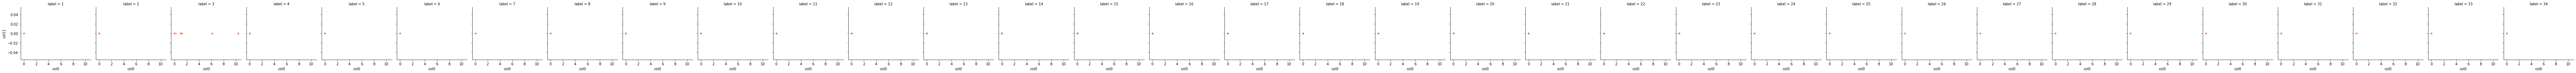

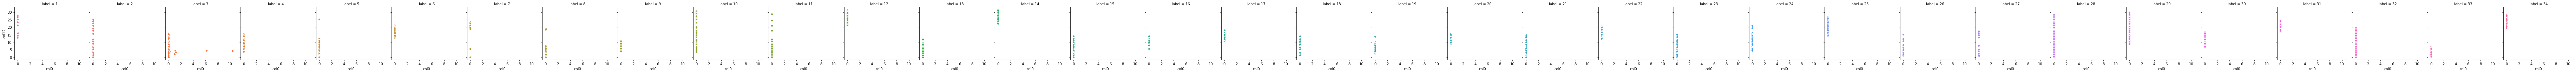

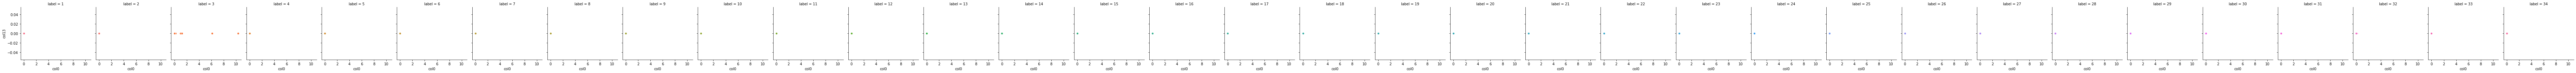

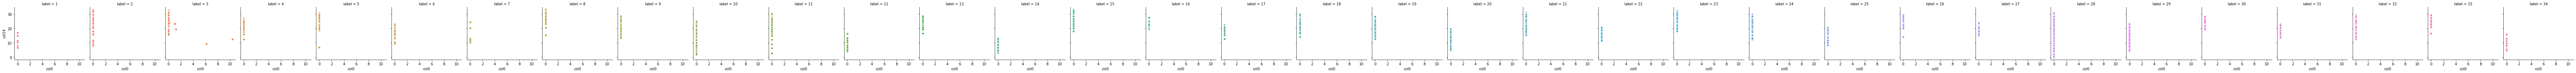

In [23]:
c1 = columns[0]
for c2 in columns[:-1]:
    if c1 == c2:
        continue

    g = sns.FacetGrid(cluster_pd, col="label", hue="label")
    g = (g.map(plt.scatter, c1, c2, edgecolor="w"))